In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# K-nearest neighbours

Consider this simple example.

In [3]:
data = pd.DataFrame({
    'mass':   [4., 5., 5., 5., 6., 7., 11., 11., 13., 13.],
    'height': [2., 1., 2., 3., 2., 4., 8.,  10., 8.,  10.],
    'label':  ['cat']*5 + ['dog']*5
},
    columns = ['mass', 'height', 'label'] # maintains column order
)
data

,mass,height,label
0,4.0,2.0,cat
1,5.0,1.0,cat
2,5.0,2.0,cat
3,5.0,3.0,cat
4,6.0,2.0,cat
5,7.0,4.0,dog
6,11.0,8.0,dog
7,11.0,10.0,dog
8,13.0,8.0,dog
9,13.0,10.0,dog


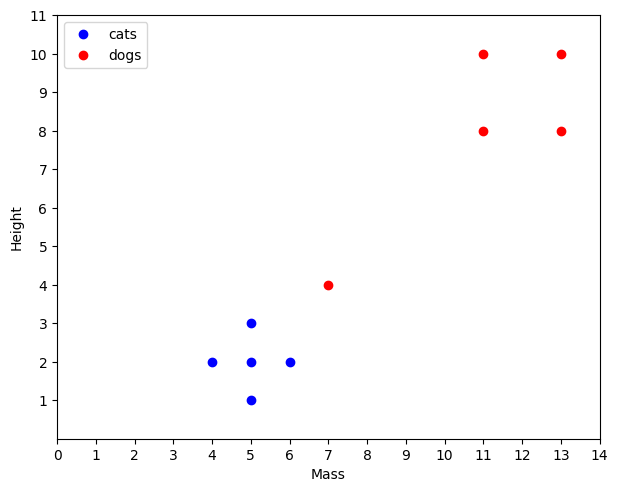

In [4]:
def plot_cats_vs_dogs(data):
    # Specify figure parameters
    fig, ax = plt.subplots(figsize=(7, 5.5))
    # Data to plot
    ax.plot(data.loc[data.label == 'cat', 'mass'],
            data.loc[data.label == 'cat', 'height'], 'bo', label='cats')
    ax.plot(data.loc[data.label == 'dog', 'mass'],
            data.loc[data.label == 'dog', 'height'], 'ro', label='dogs')

    # Specify axes parameters
    ax.set_xticks(list(range(0, 15)))
    ax.set_yticks(list(range(1, 12)))
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 11)

    # Axis labels
    ax.set_xlabel('Mass')
    ax.set_ylabel('Height')

    return ax

# Show the plot inline
plot_cats_vs_dogs(data)
plt.legend(markerscale=1, frameon=True)
plt.show()

K-nearest neighbours algorithm makes decision for each point based on nearest neighbours' classes. We can visualize decision boundaries to compare classification with different K values.

We have this unknown point (marked with cross). In which class does it belong using 1-NN, or 3-NN...?

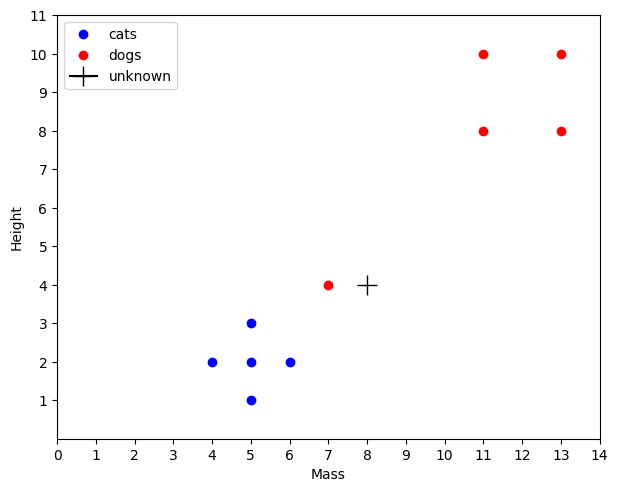

In [5]:
plot_cats_vs_dogs(data)
plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
plt.legend(markerscale=1, frameon=True)
plt.show()

Now let's see what kind of decision boundaries we get for different number of neighbors, here we try $k=\{1, 3, 5, 7, 9\}$ values.

In [6]:
def plot_decision_boundaries(model, data):
      X_train = data.iloc[:, :2]
      X_train.columns = ['x', 'y']
      y_train = data.label

      model = model.fit(X_train, y_train)

      disp = DecisionBoundaryDisplay.from_estimator(
      model, X_train, alpha=0.5, response_method='predict'
      )
      disp.ax_.scatter(data.iloc[:, 0], data.iloc[:, 1],
                      c=data.iloc[:, 2].map({'cat': 0, 'dog': 1}),
                      edgecolor="k"
                      )

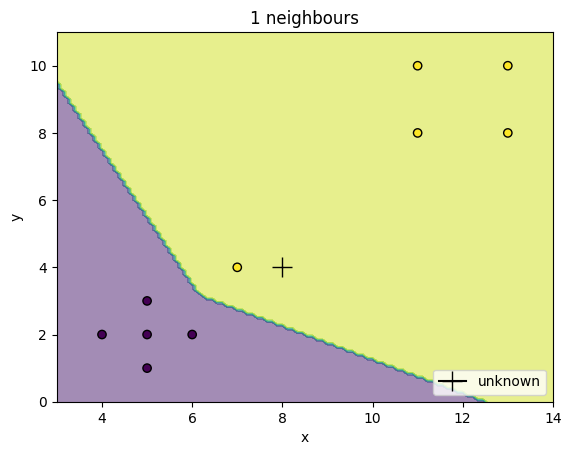

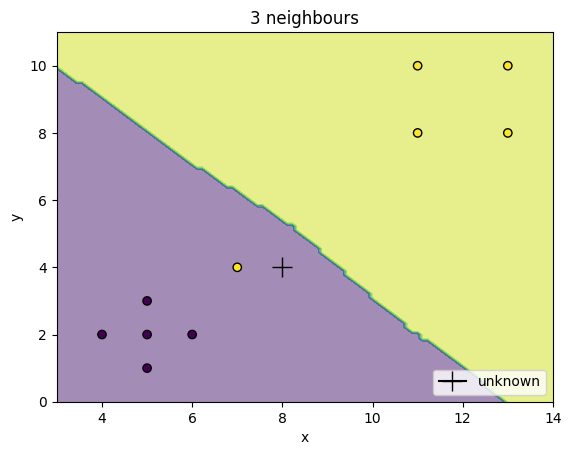

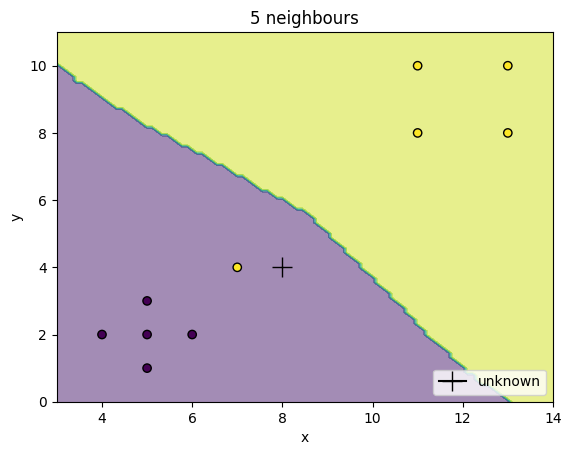

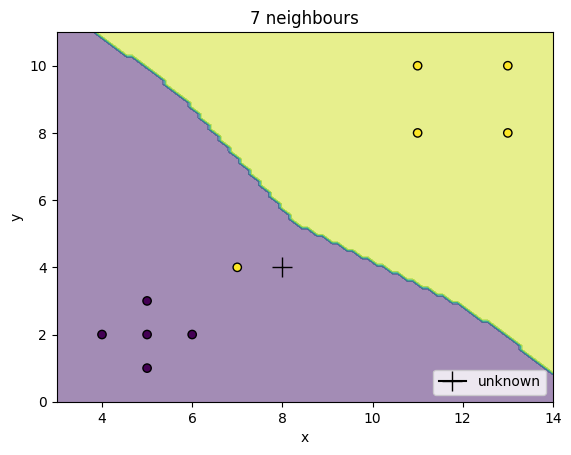

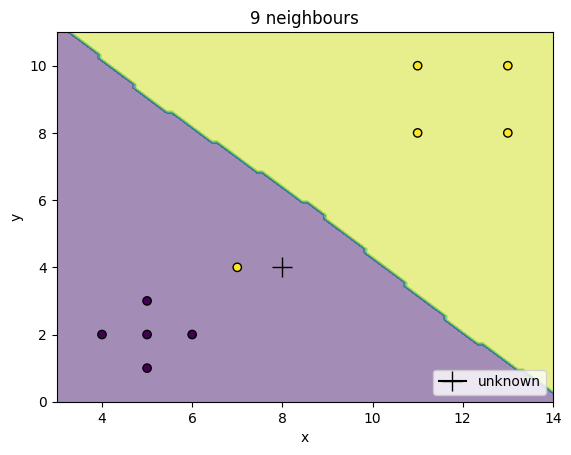

In [7]:
for i in range(1, 10, 2):
    model = KNeighborsClassifier(n_neighbors=i)
    plot_decision_boundaries(model=model, data=data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()

In the KNeighborsClassifier, the default metric is minkowski, and with p=2 it is equivalent to the standard Euclidean distance. However, we can also use some other distance measures.

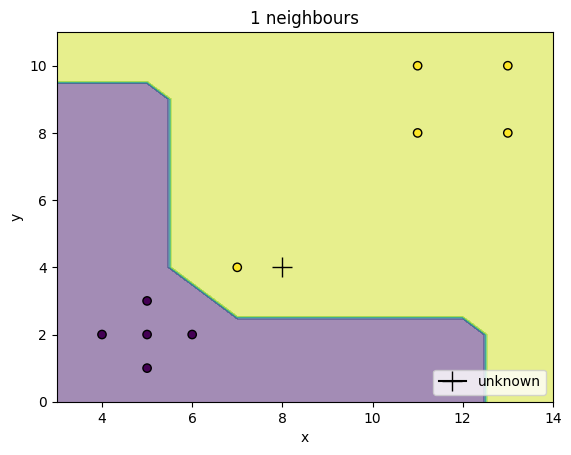

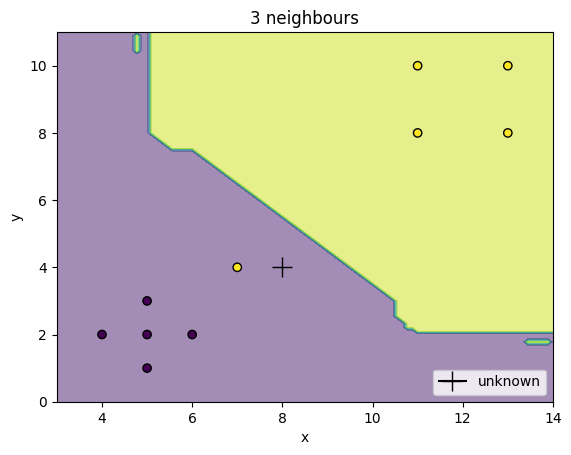

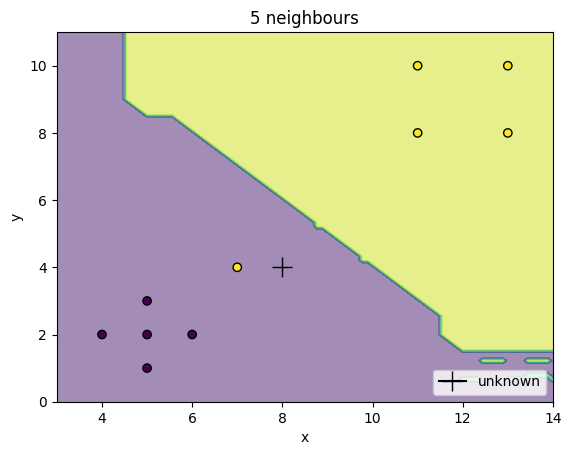

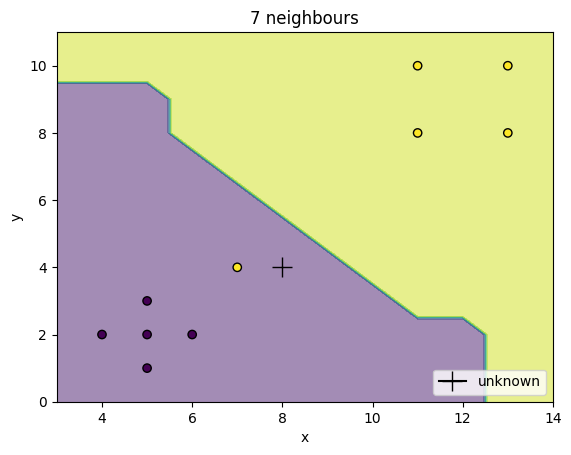

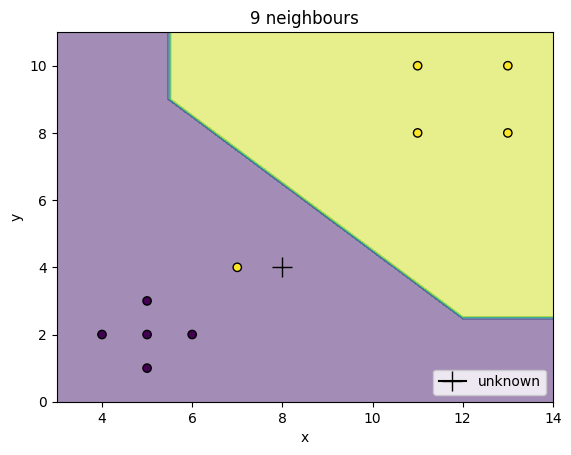

In [8]:
for i in range(1, 10, 2):
    model = KNeighborsClassifier(n_neighbors=i, metric='manhattan')   # metric=minkowski, p=1
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()

We can use weights to weight each neighbour's vote inversely to its distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

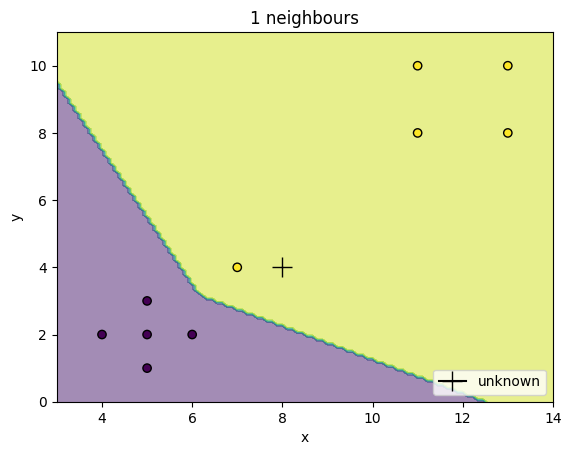

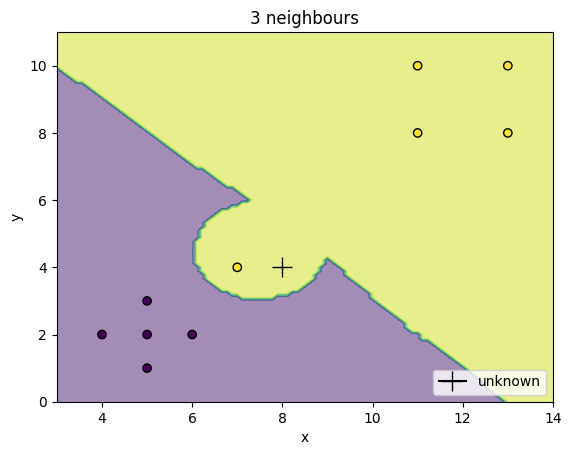

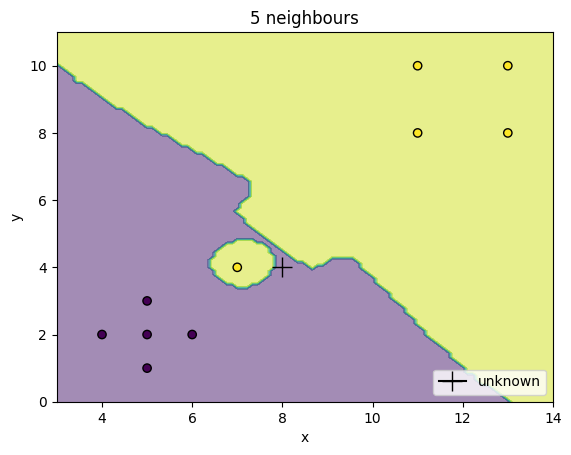

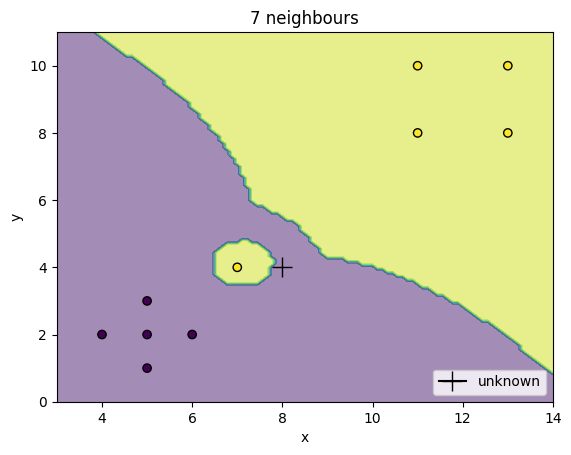

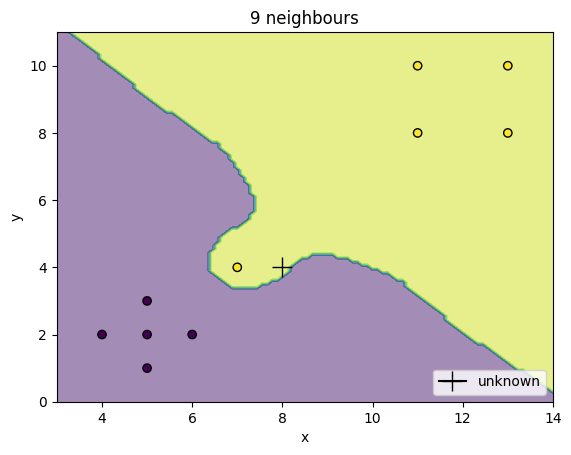

In [9]:
for i in range(1, 10, 2):
    model = KNeighborsClassifier(n_neighbors=i, weights='distance')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()


Now, let's use distance weighting and Manhattan distance instead of Euclidean distance.

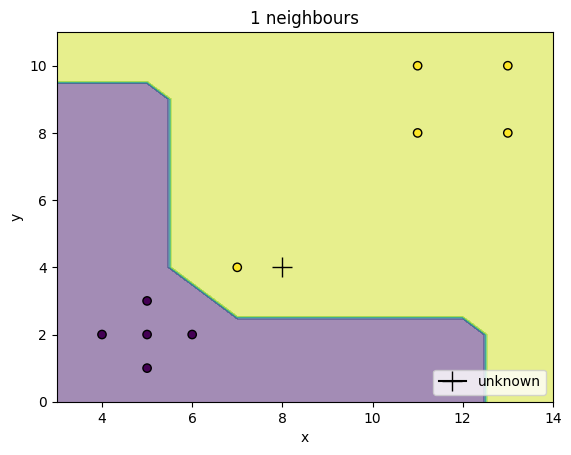

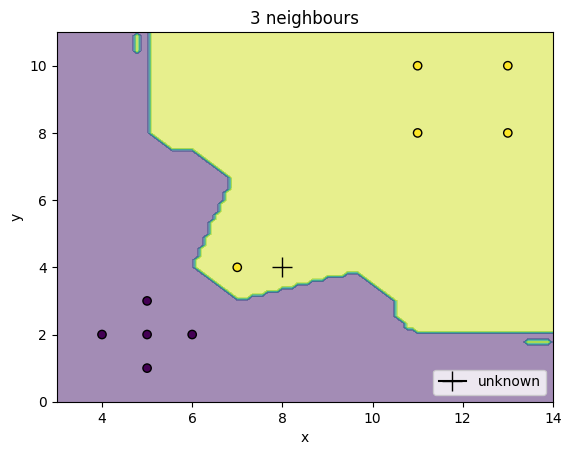

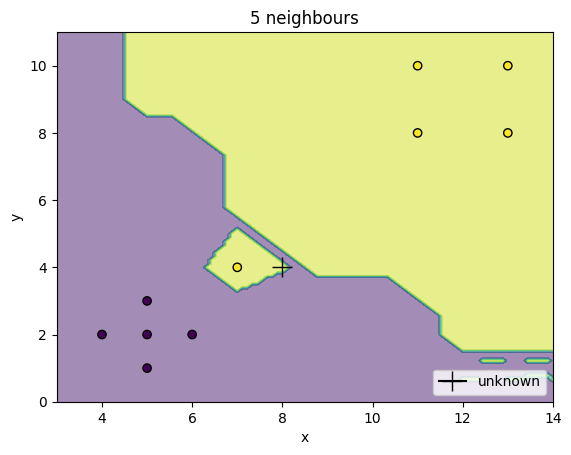

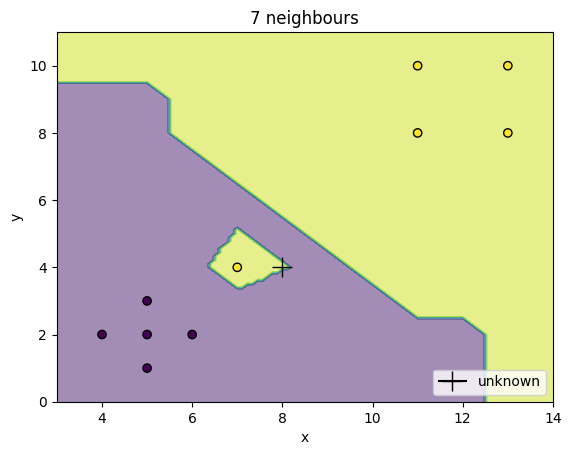

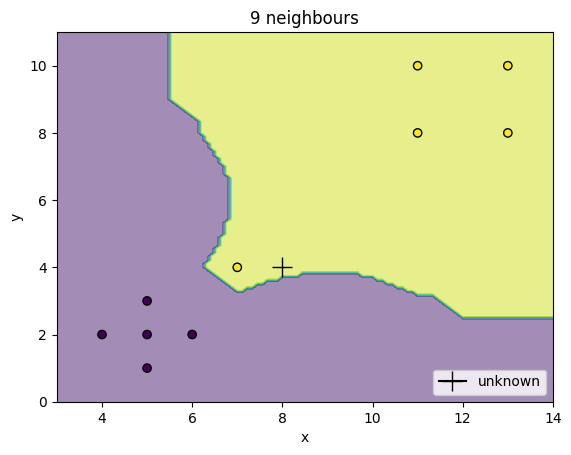

In [10]:
for i in range(1, 10, 2):
    model = KNeighborsClassifier(n_neighbors=i,
                                 weights='distance',
                                 metric='manhattan')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()

# News Classification with Naive Bayes

Naive Bayes classifier is well-known for it's good performance on `text classification` task. Here we will go through the main concepts of text classification, before building our own model.

## The Bag of Words Model

One of the most important sub-tasks in pattern classification are `feature extraction` and `selection`. Prior to fitting the model and using machine learning algorithms for training, we need to think about how to best represent a text document as a `feature vector`.

A commonly used model in Natural Language Processing is the so-called `bag of words` model. The idea behind this model is very intuitive. First comes the creation of the `vocabulary` — the collection of all different words that occur in the training set and each word is associated with a count of how often it occurs.

The vocabulary can then be used to construct the d-dimensional feature vectors for the individual documents where the dimensionality is equal to the number of different words in the vocabulary. This process is called `vectorization`.

When doing the above feature extraction, we may come across the question whether we should consider `word occurrencies` (encoding with 0s and 1s) or `word frequencies` (absolute counts of the words) in the text. The answer depends on the data and it is necessary to try both approaches. In general, the first method is usually better when applied on small texts.

![](https://miro.medium.com/v2/resize:fit:880/1*hLvya7MXjsSc3NS2SoLMEg.png)

## Tokenization

`Tokenization` describes the general process of breaking down a text corpus into individual elements that serve as input for various NLP algorithms (we have performed this task earlier in the programming module). Usually, tokenization is accompanied by other optional processing steps, such as the removal of `stop words` and `punctuation characters`, `stemming` or `lemmatizing`, and the construction of `n-grams`. Below is an example of a simple but typical tokenization step that splits a sentence into individual words, removes punctuation, and converts all letters to lowercase.

![tokenization](https://sebastianraschka.com/images/blog/2014/naive_bayes_1/tokenization-1.png)

### Stop words

Stop words are words that are particularly common in a text corpus and thus considered as rather un-informative (e.g., words such as `so`, `and`, `or`, `the`, ...). One approach to stop word removal is to search against a language-specific stop word dictionary. An alternative approach is to create a stop list by sorting all words in the entire text corpus by frequency. The stop list — after conversion into a set of non-redundant words — is then used to remove all those words from the input documents that are ranked among the top n words in this stop list.

![stop words](https://sebastianraschka.com/images/blog/2014/naive_bayes_1/stop-1.png)

## N-Grams

In the `n-gram` model, a token can be defined as a sequence of n items. The simplest case is the so-called unigram (1-gram) where each word consists of exactly one word, letter, or symbol. All previous examples were unigrams so far. Choosing the optimal number n depends on the language as well as the particular application.

![n-grams](https://sebastianraschka.com/images/blog/2014/naive_bayes_1/grams-1.png)



## Stemming

Stemming is the process of removing prefixes or suffixes from words to reduce them to their root form, which may not always be a valid word.



In [10]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
print(stemmer.stem("running"))
print(stemmer.stem("studies"))

run
studi


## Term Frequency - Inverse Document Frequency (Tf-idf)

The term frequency - inverse document frequency (Tf-idf) is another alternative for characterizing text documents. It can be understood as a weighted term frequency, which is especially useful if stop words have not been removed from the text corpus.

The Tf-idf approach assumes that the importance of a word is inversely proportional to how often it occurs across all documents.

$$\text{Tf-idf}=tf_n(t,d)\cdot idf(t),$$

where $tf_n(d,f)=\frac{tf(t,d)}{n_d}$
with $tf(t,d)$ as the count of term $t$ in document $d$ and $n_d$ as the number of total terms in document $d$ (normalized term frequency) and
$$idf(t)=log \Big(\frac{n_d}{n_d(t)} \Big),$$
with $n_d(t)$ being the number of documents containing the term $t$.

## Example

We will be working on a real dataset that consists of news from two categories `army` and `economy` scraped from [this website](https://armenpress.am/eng/).

Run the below cell to download the dataset. Note that it is already splitted into train/test parts.

In [11]:
train = pd.read_csv('train_news.csv')
test = pd.read_csv('test_news.csv')

In [12]:
train.head()

,article_title,article_paragraph,type
0,Armenia’s economic activity rate increased by ...,According to the main macro-economic indicato...,economy
1,‘Protection of state interest is my only inter...,Deputy Prime Minister of Armenia Tigran Aviny...,economy
2,Armenia to start producing gold bullions,The Central Bank of Armenia will soon open a ...,economy
3,Armenia’s economic activity index grows by 7.5...,Armenia’s economic activity index increased b...,economy
4,Kazakh companies interested in Armenian market...,The relations of Armenia and Kazakhstan remai...,economy


Now let's split create a validation dataset from the train dataset. For now let's consider only the article title.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    train['article_title'], train['type'], random_state = 0)

print("Training dataset: ", X_train.shape[0])
print("Validation dataset: ", X_val.shape[0])

Training dataset:  209
Validation dataset:  70


In [17]:
X_test = test['article_title']
y_test = test['type']

In [14]:
X_train

92     Artsakh defense minister holds consultation, d...
44     Army should participate in development process...
212    Contract soldier commits suicide in Armenia’s ...
218    Pashinyan attaches importance to establishment...
207    Minister Tonoyan receives US delegation led by...
                             ...                        
251    Opposition leader highlights “people’s opinion...
192    Priority of Armenian presidency at EEU is elim...
117    Armenian government mulls new regulations as m...
47     Footwear, textile, food products: demand for A...
172    Armenian government’s talks on gas tariff stil...
Name: article_title, Length: 209, dtype: object

In [19]:
y_val.value_counts()

type
economy     38
military    32
Name: count, dtype: int64

## Fitting on word frequencies

Before starting the modelling phase, we need to transform words to vectors.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# simple example
corpus = [
       'This is the first document.',
       'This document is the second document.',
       'And this is the third one.',
       'Is this the first document?',
   ]

vectorizer = CountVectorizer()
transformed = vectorizer.fit_transform(corpus)

# Note that the above code is the same as doing:

# vectorizer.fit(X_train)
# transformed = vectorizer.transform(corpus)


print(vectorizer.get_feature_names_out())
print(transformed.toarray(), '\n')

print('The transformation for "and one document" will be')

print(vectorizer.transform(['and one document']).toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]] 

The transformation for "and one document" will be
[[1 1 0 0 1 0 0 0 0]]


In [16]:
vectorizer = CountVectorizer(stop_words='english')
transformed = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())
print(transformed.toarray(), '\n')

print('The transformation for "and one document" will be')

print(vectorizer.transform(['and one document']).toarray())

['document' 'second']
[[1 0]
 [2 1]
 [0 0]
 [1 0]] 

The transformation for "and one document" will be
[[1 0]]


In [17]:
count_vector = CountVectorizer(stop_words='english')

training_data = count_vector.fit_transform(X_train)

val_data = count_vector.transform(X_val)

In [18]:
training_data.toarray().shape

(209, 848)

In [24]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [ ]:
predictions = naive_bayes.predict(val_data)

In [27]:
predictions

array(['military', 'military', 'military', 'military', 'economy',
       'economy', 'economy', 'economy', 'economy', 'economy', 'economy',
       'military', 'economy', 'economy', 'military', 'economy', 'economy',
       'military', 'economy', 'military', 'military', 'military',
       'military', 'economy', 'military', 'military', 'economy',
       'military', 'economy', 'economy', 'military', 'economy',
       'military', 'military', 'military', 'economy', 'military',
       'economy', 'military', 'military', 'economy', 'economy',
       'military', 'military', 'economy', 'economy', 'military',
       'economy', 'military', 'military', 'military', 'military',
       'military', 'economy', 'economy', 'military', 'military',
       'military', 'economy', 'military', 'military', 'economy',
       'economy', 'economy', 'military', 'economy', 'economy', 'military',
       'economy', 'military'], dtype='<U8')

In [26]:
from sklearn.metrics import accuracy_score

print("Accuracy score: ", accuracy_score(y_val, predictions))

Accuracy score:  0.9285714285714286


Let's see on what errors made our classifier.

In [ ]:
print(y_val[predictions != y_val])

In [ ]:
with pd.option_context('max_colwidth', 1000):
    print(X_val[predictions != y_val])

## Fitting on word occurrencies

In [ ]:
occurrence_vector = CountVectorizer(stop_words='english', binary=True)
training_data1 = occurrence_vector.fit_transform(X_train)
val_data1 = occurrence_vector.transform(X_val)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(training_data1, y_train)
predictions = bernoulli_nb.predict(val_data1)
print("Accuracy score: ", accuracy_score(y_val, predictions))

We can notice that the model performance stays the same when we give the word occurrencies as input to the model.

## Fitting on tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(stop_words='english')
training_data1 = tfidf_vector.fit_transform(X_train)
testing_data1 = tfidf_vector.transform(X_val)

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data1, y_train)
predictions = naive_bayes.predict(testing_data1)
print("Accuracy score: ", accuracy_score(y_val, predictions))

## Fitting on 2-grams

First let's make sure we understand this concept on this simple example.

In [ ]:
# simple example
corpus = [
       'This is the first document.',
       'This document is the second document.',
       'And this is the third one.',
       'Is this the first document?',
   ]

vectorizer2 = CountVectorizer(ngram_range=(1, 2))
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names_out())
print(vectorizer2.transform(['and one document']).toarray())
# print(X2.toarray())

In [ ]:
count_vector = CountVectorizer(stop_words='english',
                               ngram_range=(1, 4))

training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_val)
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)
predictions = naive_bayes.predict(testing_data)
print("Accuracy score: ", accuracy_score(y_val, predictions))

We have not noticed any difference between these pre-processing approaches, now let's select one of them to train a model on the whole training set and test its performance on the test set.

In [ ]:
training_data = occurrence_vector.fit_transform(train['article_title'])
testing_data = occurrence_vector.transform(X_test)

In [ ]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(training_data, train['type'])
predictions = bernoulli_nb.predict(testing_data)
print("Accuracy score: ", accuracy_score(y_test, predictions))

Luckily we got a similar accuracy score on the held-out test set.

Although we did not notice any difference between the above processing approaches on article titles, it is worth trying them on article paragraphs as well. **Go over the first homework tasks to verify this**.